## 6.4 Machine Learning Part 1

This script contains the following:
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis
Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\djval\Google Drive\Career\Career Foundry\Data Immerson\Achievement 6'

In [4]:
path

'C:\\Users\\djval\\Google Drive\\Career\\Career Foundry\\Data Immerson\\Achievement 6'

In [5]:
df = pd.read_csv(os.path.join(path,'Exercise 6.1','Datasets','country - Main dataset - 3.csv'))

### 2. Data cleaning

In [6]:
df.columns

Index(['CTYNAME', 'year', 'CTY_CODE', 'IYR', 'EYR', 'Trade_deficit',
       'Unemployment_rate'],
      dtype='object')

In [7]:
df.head(20)

,CTYNAME,year,CTY_CODE,IYR,EYR,Trade_deficit,Unemployment_rate
0,"World, Seasonally Adjusted",2021,4,2579465.677,1594693.680,984771.997,5.358333
1,"World, Not Seasonally Adjusted",2021,15,2575023.560,1595320.535,979703.025,5.358333
2,"World, Seasonally Adjusted",2018,4,2536145.274,1665786.887,870358.387,3.891667
3,"World, Not Seasonally Adjusted",2018,15,2536145.274,1665786.887,870358.387,3.891667
4,"World, Seasonally Adjusted",2019,4,2493737.709,1642820.352,850917.357,3.675000
5,"World, Not Seasonally Adjusted",2019,15,2493737.709,1642820.352,850917.357,3.675000
6,"World, Seasonally Adjusted",2014,4,2356356.072,1621873.793,734482.279,6.158333
7,"World, Not Seasonally Adjusted",2014,15,2356356.072,1621873.793,734482.279,6.158333
8,"World, Seasonally Adjusted",2017,4,2339592.000,1547196.000,792396.000,4.358333
9,"World, Not Seasonally Adjusted",2017,15,2339591.330,1547195.403,792395.927,4.358333


In [8]:
df.shape

(7981, 7)

In [10]:
# Check for missing values

df.isnull().sum() # No missing values to handle

CTYNAME              0
year                 0
CTY_CODE             0
IYR                  0
EYR                  0
Trade_deficit        0
Unemployment_rate    0
dtype: int64

##### Duplicates check

In [12]:
dups = df.duplicated()

In [13]:
dups.shape # No dups

(7981,)

In [17]:
# Creating subset for South and Central America which has one of the biggest % increase of US imports from 2020 to 2021

df_south_central_am = df[df['CTYNAME'].isin(["Brazil","Argentina","Colombia","Peru","Chile","Ecuador","Venezuela","Bolivia","Uruguay","Guyana","Paraguay","Suriname","Belize","Costa Rica","El Salvador","Guatemala","Honduras","Nicaragua","Panama"])]

## Hypothesis: If there is a finanical crisis in the United States, the US will increase its % of imports and exports with countires with the lowest GDP during the recession. 

##### Extreme values checks

C:\Users\djval\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='IYR', ylabel='Density'>

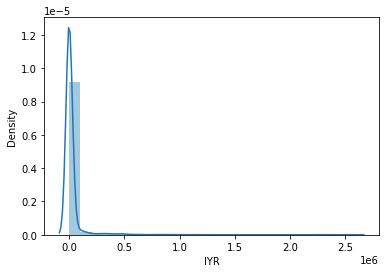

In [24]:
sns.distplot(df['IYR'], bins=25) # Shows extreme values

C:\Users\djval\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EYR', ylabel='Density'>

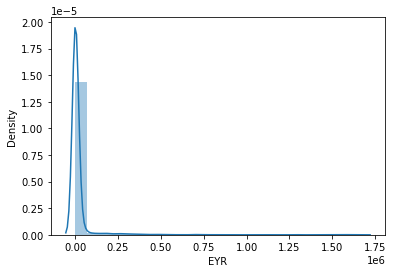

In [26]:
sns.distplot(df['EYR'], bins=25) # Shows extreme values

# Extreme outliers do not need to be removed. 

### 3. Data prep for regression analysis 

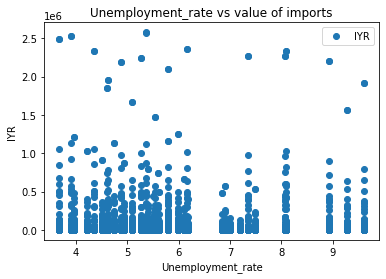

In [27]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Unemployment_rate', y='IYR',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Unemployment_rate vs value of imports')  
plt.xlabel('Unemployment_rate')  
plt.ylabel('IYR')  
plt.show()

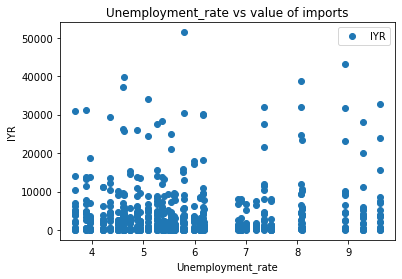

In [28]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_south_central_am.plot(x = 'Unemployment_rate', y='IYR',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Unemployment_rate vs value of imports')  
plt.xlabel('Unemployment_rate')  
plt.ylabel('IYR')  
plt.show()

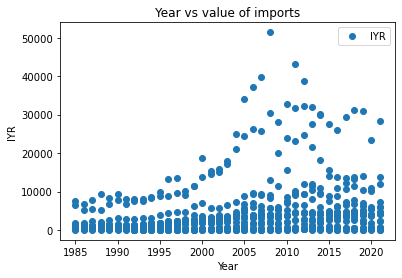

In [29]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_south_central_am.plot(x = 'year', y='IYR',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Year vs value of imports')  
plt.xlabel('Year')  
plt.ylabel('IYR')  
plt.show()

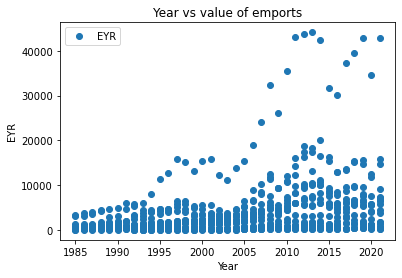

In [30]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_south_central_am.plot(x = 'year', y='EYR',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Year vs value of exports')  
plt.xlabel('Year')  
plt.ylabel('EYR')  
plt.show()

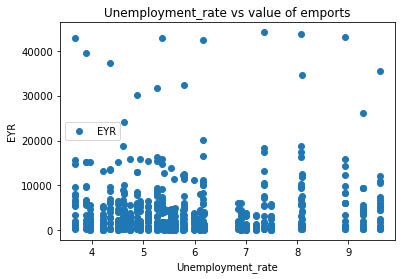

In [31]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_south_central_am.plot(x = 'Unemployment_rate', y='EYR',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Unemployment_rate vs value of emports')  
plt.xlabel('Unemployment_rate')  
plt.ylabel('EYR')  
plt.show()

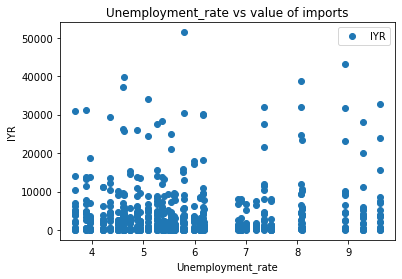

In [36]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_south_central_am.plot(x = 'Unemployment_rate', y='IYR',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Unemployment_rate vs value of imports')  
plt.xlabel('Unemployment_rate')  
plt.ylabel('IYR')  
plt.show()

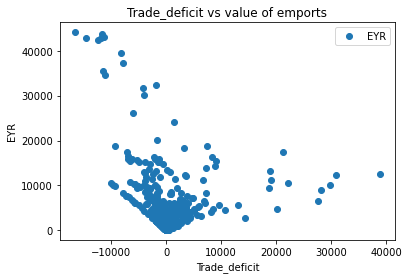

In [32]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_south_central_am.plot(x = 'Trade_deficit', y='EYR',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Trade_deficit vs value of emports')  
plt.xlabel('Trade_deficit')  
plt.ylabel('EYR')  
plt.show()

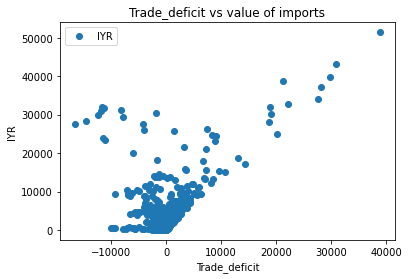

In [33]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_south_central_am.plot(x = 'Trade_deficit', y='IYR',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Trade_deficit vs value of imports')  
plt.xlabel('Trade_deficit')  
plt.ylabel('IYR')  
plt.show()

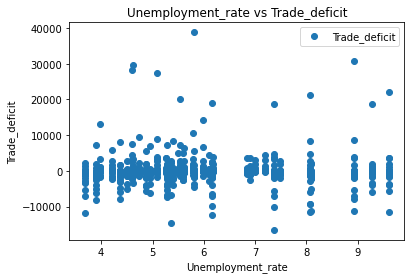

In [35]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_south_central_am.plot(x = 'Unemployment_rate', y='Trade_deficit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Unemployment_rate vs Trade_deficit')  
plt.xlabel('Unemployment_rate')  
plt.ylabel('Trade_deficit')  
plt.show()

## Hypothesis: If there is a finanical crisis in the United States, the US will increase its % of imports and exports with countires with the lowest GDP during the recession. 

# Reshape the variables into NumPy arrays and put them into separate objects.


In [48]:
X = df['year'].values.reshape(-1,1)
y = df['EYR'].values.reshape(-1,1)

In [50]:
X

array([[2021],
       [2021],
       [2018],
       ...,
       [2001],
       [2002],
       [2003]], dtype=int64)

In [52]:
y

array([[1594693.68 ],
       [1595320.535],
       [1665786.887],
       ...,
       [      0.   ],
       [      0.   ],
       [      0.   ]])

In [53]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [54]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [55]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [56]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

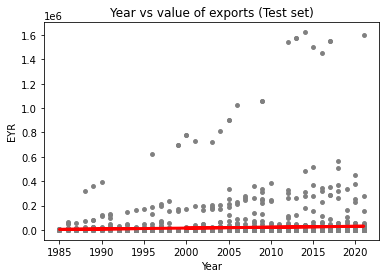

In [57]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Year vs value of exports (Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('EYR')
plot_test.show()

In [58]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [59]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[724.85115292]]
Mean squared error:  14995125606.925066
R2 score:  0.003931223274442508


In [60]:
y_predicted

array([[14993.9444179 ],
       [20792.75364126],
       [28766.11632339],
       ...,
       [14993.9444179 ],
       [22967.30710003],
       [10644.83750038]])

In [61]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1507.000000,14993.944418
1,12484.248430,20792.753641
2,105.232004,28766.116323
3,14.544129,24417.009406
4,1618.327436,28766.116323
5,231223.038400,29490.967476
6,120247.580100,18618.200183
7,169.325571,20792.753641
8,173062.600500,17168.497877
9,41.800000,14269.093265


##### Compare how the regression fits the training set

In [62]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [63]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [64]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[724.85115292]]
Mean squared error:  10888858416.882074
R2 score:  0.004497830640193934


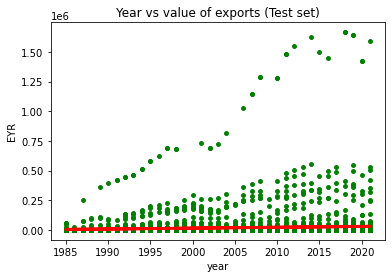

In [65]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Year vs value of exports (Test set)')
plot_test.xlabel('year')
plot_test.ylabel('EYR')
plot_test.show()

My thoughts is that this model is a poor fit as the R2 score is a 0.00449. I believe at this point, I need to source more data to show a relations ship to a financial crisis in the US and the changes in imports and exports with South and Central American and Africa. 